# A classification problem with Naive Bayes

## Agenda 

- Understand the process in a classification problem.

- Understand data cleaning and feature engineering process.

- Understand the modeling process. 

In [1]:
import pandas as pd

In [5]:
# write a function that read the data from UCI-repisotary

# https://archive.ics.uci.edu/ml/datasets/Adult

In [3]:
# read the dataset

col_names = ['age', 'workClass', 
         'samplingWgt', 'ed',
         'edYears', 'maritalStatus',
         'occupation', 'relationship',
         'race', 'sex', 'capitalGain', 'capitalLoss', 'hrsPerWeek', 'nativeCntry', 'salary']

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

adult = pd.read_csv(url, 
               index_col= False, 
               names = col_names, 
               header = 0, skiprows= 0 )

In [4]:
print(adult.shape)
adult.head()

(32560, 15)


,age,workClass,samplingWgt,ed,edYears,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hrsPerWeek,nativeCntry,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## Problem Statement:

We have a dataset from 94 census data. In this data every row corresponds to a person who responded this census. Data contains 32560 observations and 15 variables. Variables includes respondents demographic information. The 'salary' column contains whether a particular observation is gaining more than 50K income or not. Our goal is to use the other variables as dependent variable and successfully predict whether someone is gaining more than 50K income or not. 

In [6]:
# for the test set
url_test = "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"

test = pd.read_csv(url_test, 
               index_col= False, 
               names = col_names,
               skiprows= 1 )

print(test.shape)
test.tail()

(16281, 15)


,age,workClass,samplingWgt,ed,edYears,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hrsPerWeek,nativeCntry,salary
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.
16280,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K.


## Data Cleaning

__Copy Data__

In [8]:
## Create a copy so that the original datasets are preserved.
data = adult.copy()
test_data = test.copy()

__Variables__

In [9]:
print(col_names)

['age', 'workClass', 'samplingWgt', 'ed', 'edYears', 'maritalStatus', 'occupation', 'relationship', 'race', 'sex', 'capitalGain', 'capitalLoss', 'hrsPerWeek', 'nativeCntry', 'salary']


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            32560 non-null  int64 
 1   workClass      32560 non-null  object
 2   samplingWgt    32560 non-null  int64 
 3   ed             32560 non-null  object
 4   edYears        32560 non-null  int64 
 5   maritalStatus  32560 non-null  object
 6   occupation     32560 non-null  object
 7   relationship   32560 non-null  object
 8   race           32560 non-null  object
 9   sex            32560 non-null  object
 10  capitalGain    32560 non-null  int64 
 11  capitalLoss    32560 non-null  int64 
 12  hrsPerWeek     32560 non-null  int64 
 13  nativeCntry    32560 non-null  object
 14  salary         32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


1. Salary 

In [12]:
import numpy as np

In [13]:
# original values
adult.salary.value_counts()

 <=50K    24719
 >50K      7841
Name: salary, dtype: int64

In [17]:
adult.salary.value_counts().index.tolist()

[' <=50K', ' >50K']

In [14]:
# Now change the values in 'salary' and check the result
data['salary'] = np.where(adult.salary == ' <=50K', 0, 1)
data.salary.value_counts()

0    24719
1     7841
Name: salary, dtype: int64

In [15]:
# original values 
test.salary.value_counts()

 <=50K.    12435
 >50K.      3846
Name: salary, dtype: int64

In [16]:
# Now change the values in 'salary' and check the result
test_data['salary'] = np.where(test.salary == ' <=50K.', 0, 1)
test_data.salary.value_counts()

0    12435
1     3846
Name: salary, dtype: int64

2. Age

In [20]:
# Check whether there is any missing values in age
adult.age.isna().sum()

0

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

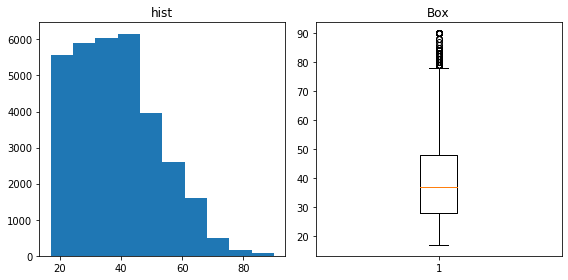

In [22]:
# check the distribution of age
fig = plt.figure(figsize = (8,4))

cols = 2
rows = 1

# plt hist of ages
ax1 = fig.add_subplot(rows, cols, 1)
ax1.set_title('hist')
ax1.hist(adult.age)

# plt a box plt
ax2 = fig.add_subplot(rows, cols, 2)
ax2.set_title('Box')
ax2.boxplot(adult.age)
plt.tight_layout()

In [23]:
# Check Min and Max and count
adult.age.describe()

count    32560.000000
mean        38.581634
std         13.640642
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

3. workClass

Note that this column is a categorical one

In [28]:
adult.workClass.value_counts().index.tolist()

[' Private',
 ' Self-emp-not-inc',
 ' Local-gov',
 ' ?',
 ' State-gov',
 ' Self-emp-inc',
 ' Federal-gov',
 ' Without-pay',
 ' Never-worked']

In [29]:
## let's check the values with '?'
# adult.loc[adult.workClass == ' ?']

In [19]:
# looks like there is none?
# note that workclass categories having a space before each category
adult.workClass.value_counts().index.tolist()

[' Private',
 ' Self-emp-not-inc',
 ' Local-gov',
 ' ?',
 ' State-gov',
 ' Self-emp-inc',
 ' Federal-gov',
 ' Without-pay',
 ' Never-worked']

In [20]:
adult.loc[adult.workClass == ' ?'].describe()

,age,samplingWgt,edYears,capitalGain,capitalLoss,hrsPerWeek
count,1836.000000,1836.000000,1836.000000,1836.000000,1836.000000,1836.000000
mean,40.960240,188516.338235,9.260349,606.795752,60.760349,31.919390
std,20.334587,107089.902252,2.601986,5147.323872,354.685264,14.909903
min,17.000000,12285.000000,1.000000,0.000000,0.000000,1.000000
25%,21.000000,117771.250000,9.000000,0.000000,0.000000,20.000000
50%,35.000000,175617.000000,9.000000,0.000000,0.000000,36.000000
75%,61.000000,234568.500000,10.000000,0.000000,0.000000,40.000000
max,90.000000,981628.000000,16.000000,99999.000000,4356.000000,99.000000


looks like we have a lot of outliers in samplingWgt, 'capitalGain', 'capitalLoss' and 'hrsPerweek'


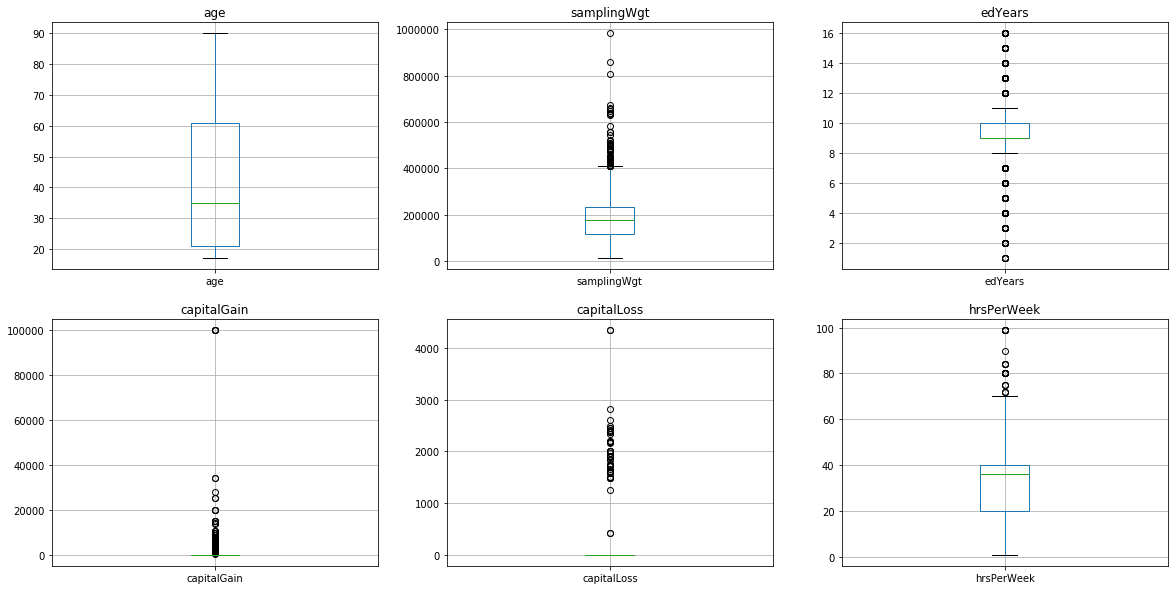

In [30]:
unknown_workclass = adult.loc[adult.workClass == ' ?']
fig = plt.figure(figsize=(20, 10))
cols = 3
rows = 2
column_list = adult.loc[adult.workClass == ' ?'].describe().columns.tolist()
for i, column in enumerate(column_list):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    unknown_workclass.boxplot(column = column, ax = ax)

plt.subplots_adjust(hspace=0.2, wspace=0.21)



3. sampleWgt

In [22]:
adult.samplingWgt.isna().sum()

0

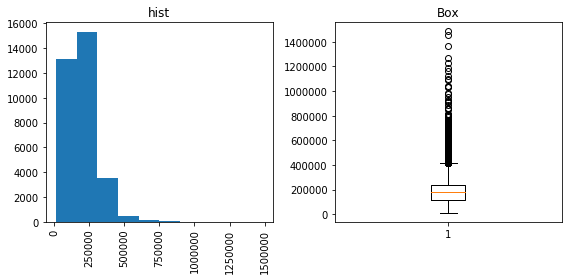

In [31]:
# check the distribution of age
fig = plt.figure(figsize = (8,4))

cols = 2
rows = 1

# plt hist of ages
ax1 = fig.add_subplot(rows, cols, 1)
ax1.set_title('hist')
ax1.hist(adult.samplingWgt)
plt.xticks(rotation = 90)
# plt a box plt
ax2 = fig.add_subplot(rows, cols, 2)
ax2.set_title('Box')
ax2.boxplot(adult.samplingWgt)
plt.tight_layout()

4. ed

In [32]:
adult.ed.value_counts(dropna = False)

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: ed, dtype: int64

5. edYears

In [33]:
adult.edYears.value_counts(dropna = False)

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: edYears, dtype: int64

6. maritalStatus

In [34]:
adult.maritalStatus.value_counts(dropna = False)

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: maritalStatus, dtype: int64

7. occupation

In [35]:
adult.occupation.value_counts(dropna = False)

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

8. relationship

In [36]:
adult.relationship.value_counts(dropna = False)

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

9. race

In [37]:
adult.race.value_counts(dropna=False)

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

10. sex

In [38]:
adult.sex.value_counts(dropna=False)

 Male      21789
 Female    10771
Name: sex, dtype: int64

11. capitalGain

In [39]:
adult.capitalGain.isnull().sum()

0

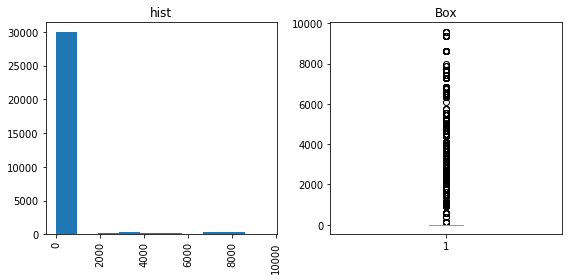

In [40]:
# check the distribution of age
fig = plt.figure(figsize = (8,4))

cols = 2
rows = 1

# plt hist of ages
ax1 = fig.add_subplot(rows, cols, 1)
ax1.set_title('hist')
ax1.hist(adult.capitalGain[adult.capitalGain < 10000])
plt.xticks(rotation = 90)
# plt a box plt
ax2 = fig.add_subplot(rows, cols, 2)
ax2.set_title('Box')
ax2.boxplot(adult.capitalGain[adult.capitalGain < 10000])
plt.tight_layout()

As we can see from the box-plot the values very close to 100K are probably missing values.

In [41]:
## almost all of the values are 0 (29849 out of 32560).
adult.capitalGain.value_counts()

# it looks like this variable is almost categorical 

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: capitalGain, Length: 119, dtype: int64

12. capitalLoss

In [42]:
adult.capitalLoss.isnull().sum()

0

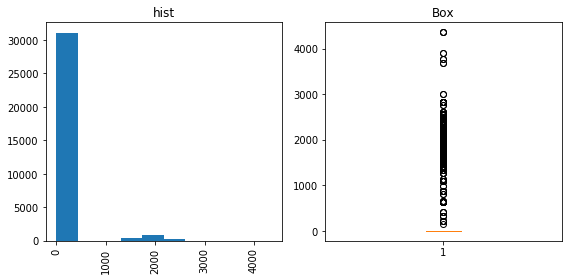

In [43]:
# check the distribution of age
fig = plt.figure(figsize = (8,4))

cols = 2
rows = 1

# plt hist of ages
ax1 = fig.add_subplot(rows, cols, 1)
ax1.set_title('hist')
ax1.hist(adult.capitalLoss)
plt.xticks(rotation = 90)
# plt a box plt
ax2 = fig.add_subplot(rows, cols, 2)
ax2.set_title('Box')
ax2.boxplot(adult.capitalLoss)
plt.tight_layout()

In [44]:
## almost all of the values are 0 (31041 out of 32560).
adult.capitalLoss.value_counts()

# it looks like this variable is almost categorical 

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
1411        1
1539        1
2472        1
1944        1
2201        1
Name: capitalLoss, Length: 92, dtype: int64

13. hrsPerWeek

In [45]:
adult.hrsPerWeek.isna().sum()

0

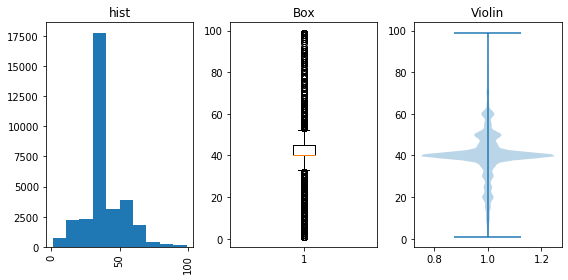

In [46]:
# check the distribution of age
fig = plt.figure(figsize = (8,4))

cols = 3
rows = 1

# plt hist of ages
ax1 = fig.add_subplot(rows, cols, 1)
ax1.set_title('hist')
ax1.hist(adult.hrsPerWeek)
plt.xticks(rotation = 90)
# plt a box plt
ax2 = fig.add_subplot(rows, cols, 2)
ax2.set_title('Box')
ax2.boxplot(adult.hrsPerWeek)
plt.tight_layout()

# plt a violinplot

ax3 = fig.add_subplot(rows, cols, 3)
ax3.set_title('Violin')
ax3.violinplot(adult.hrsPerWeek)
plt.tight_layout()

In [47]:
adult.hrsPerWeek.value_counts(dropna=False)

40    15216
50     2819
45     1824
60     1475
35     1297
      ...  
92        1
94        1
87        1
74        1
82        1
Name: hrsPerWeek, Length: 94, dtype: int64

I think we can bin these values.

14. nativeCntry

In [54]:
adult.nativeCntry.value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

Converting them to regions like: Europe, Latin America, Middle East, China, Russia, Ex-Soviet etc ?

In [49]:
adult.head(2)

,age,workClass,samplingWgt,ed,edYears,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hrsPerWeek,nativeCntry,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


## Dummy Model

Note that the dummy model (a model predicts every case as the majority class) performs with:

In [50]:
1 - data.salary.mean()

0.7591830466830467

## Pick a metric for model evaluation

- Accuracy

- Recall 

- Precision

- F1-score

- F_beta

- AUC

## Baseline - With Categorical Naive Bayes

In [103]:
X = data[['workClass', 'ed', 'edYears', 'age',
          'maritalStatus', 'occupation', 
          'relationship', 'race', 'sex', 
          'nativeCntry', 'capitalGain',
          'capitalLoss', 'hrsPerWeek']]

y = data.salary


Convert categories to numbers. Note that Categorical Naive Bayes will treat these numbers as categories within the features.

In [104]:
from sklearn.naive_bayes import CategoricalNB

In [105]:
clf = CategoricalNB()

In [106]:
from sklearn.preprocessing import OrdinalEncoder

In [107]:
ordinal_encoder = OrdinalEncoder()
X = ordinal_encoder.fit_transform(X)

In [108]:
X

array([[  6.,   9.,  12., ...,   0.,   0.,  12.],
       [  4.,  11.,   8., ...,   0.,   0.,  39.],
       [  4.,   1.,   6., ...,   0.,   0.,  39.],
       ...,
       [  4.,  11.,   8., ...,   0.,   0.,  39.],
       [  4.,  11.,   8., ...,   0.,   0.,  19.],
       [  5.,  11.,   8., ..., 108.,   0.,  39.]])

Cross validate for estimating the test score

In [64]:
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import CategoricalNB

In [65]:
categoricalNB = CategoricalNB()

In [66]:
cv = cross_validate(categoricalNB, X, y, cv = 5 )

In [67]:
cv['test_score']

array([0.83353808, 0.83415233, 0.83568796, 0.84382678, 0.83875921])

Therefore we should expect that with CategoricalNaiveBayes we get a test accuracy around 0.83-0.84

In [68]:
from sklearn.metrics import confusion_matrix

import seaborn as sns

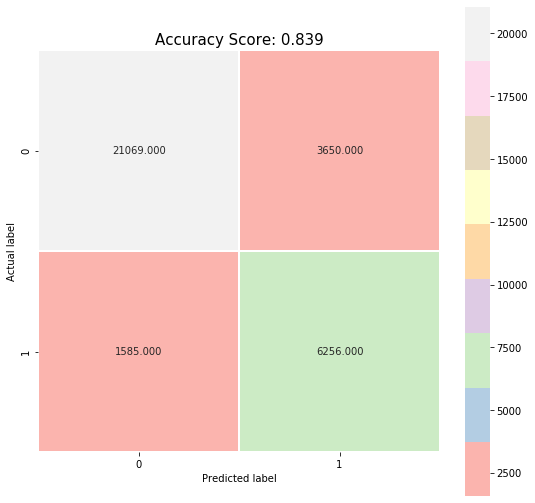

In [69]:
categoricalNB = CategoricalNB()
categoricalNB.fit(X,y)
y_pred = categoricalNB.predict(X)
score = np.round(categoricalNB.score(X,y), 3)
cm = confusion_matrix(y, y_pred)


plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
#plt.show();


## Feature Engineering

Note that in this notebook I convert every feature to categorical because I wanted to be able to use CategoricalNB. Otherwise this might not be the best idea.

### Binning Age

In [70]:
bins = np.histogram(adult.age)[1]
data.age = np.digitize(adult.age, bins = bins)
test_data.age = np.digitize(test.age, bins = bins)

In [71]:
bins

array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ])

In [72]:
print(np.sort(data.age.value_counts().index.tolist()))
print(np.sort(test_data.age.value_counts().index.tolist()))

[ 1  2  3  4  5  6  7  8  9 10 11]
[ 1  2  3  4  5  6  7  8  9 10 11]


### edYears

In [73]:
adult.edYears.value_counts(normalize = False)

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: edYears, dtype: int64

In [74]:
## assuming these years start with HighSchool
bins = np.histogram(adult.edYears)[1]
data.edYears = np.digitize(adult.edYears, bins = bins)
test_data.edYears = np.digitize(test.edYears, bins = bins)

In [75]:
print(np.sort(data.edYears.value_counts().index.tolist()))
print(np.sort(test_data.edYears.value_counts().index.tolist()))

[ 1  2  3  4  5  6  7  8  9 10 11]
[ 1  2  3  4  5  6  7  8  9 10 11]


### Binning hrsPerWeek

In [76]:
bins = np.histogram(adult.hrsPerWeek)[1]

data.hrsPerWeek = np.digitize(adult.hrsPerWeek, bins = bins)
test_data.hrsPerWeek = np.digitize(test.hrsPerWeek, bins = bins)

In [77]:
print(np.sort(data.hrsPerWeek.value_counts().index.tolist()))
print(np.sort(test_data.hrsPerWeek.value_counts().index.tolist()))

[ 1  2  3  4  5  6  7  8  9 10 11]
[ 1  2  3  4  5  6  7  8  9 10 11]


In [78]:
data.head(2)

,age,workClass,samplingWgt,ed,edYears,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hrsPerWeek,nativeCntry,salary
0,5,Self-emp-not-inc,83311,Bachelors,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,2,United-States,0
1,3,Private,215646,HS-grad,6,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,4,United-States,0


### Binning capitalGain

In [79]:
adult.capitalGain.value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: capitalGain, Length: 119, dtype: int64

In [80]:
bins = np.array([0, 1, 100, 1000, 5000, 10000, 100000])
data.capitalGain = np.digitize(adult.capitalGain, bins = bins)
test_data.capitalGain = np.digitize(test.capitalGain, bins = bins)


In [81]:
print(np.sort(data.capitalGain.value_counts().index.tolist()))
print(np.sort(test_data.capitalGain.value_counts().index.tolist()))

[1 3 4 5 6]
[1 3 4 5 6]


### Binning capitalLoss

In [82]:
bins = np.array([0,100, 1000, 2000, 3000, 4000, 5000])
data.capitalLoss = np.digitize(adult.capitalLoss, bins = bins)
test_data.capitalLoss = np.digitize(test.capitalLoss, bins = bins)


In [83]:
print(np.sort(data.capitalLoss.value_counts().index.tolist()))
print(np.sort(test_data.capitalLoss.value_counts().index.tolist()))

[1 2 3 4 5 6]
[1 2 3 4 5]


### Binning samplingWgt

In [84]:
bins = np.histogram(adult.samplingWgt)[1]
data.samplingWgt = np.digitize(adult.samplingWgt, bins = bins)
test_data.samplingWgt = np.digitize(test.samplingWgt, bins = bins)

In [85]:
print(np.sort(data.samplingWgt.value_counts().index.tolist()))
print(np.sort(test_data.samplingWgt.value_counts().index.tolist()))

[ 1  2  3  4  5  6  7  8  9 10 11]
[ 1  2  3  4  5  6  7  8  9 11]


### Converting categories to integers

In [86]:
from sklearn.compose import ColumnTransformer

In [87]:
ordinal_encoder = OrdinalEncoder()
X_train = ordinal_encoder.fit_transform(data.drop(columns = ['salary', 'samplingWgt']))
X_test = ordinal_encoder.transform(test_data.drop(columns = ['salary', 'samplingWgt']), )

In [88]:
X_train.shape
X_test.shape

(16281, 13)

## Modeling - With Binned Features

In [89]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import CategoricalNB

In [90]:
cnb_clf = CategoricalNB()
cv = cross_val_score(cnb_clf, X_train,y, cv =4)
cv

array([0.82039312, 0.82235872, 0.82825553, 0.82714988])

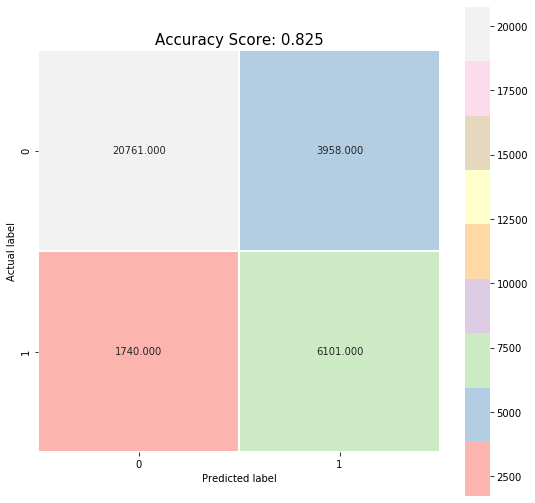

In [91]:
categoricalNB = CategoricalNB()
categoricalNB.fit(X_train,y)
y_pred = categoricalNB.predict(X_train)
score = np.round(categoricalNB.score(X_train,y), 3)
cm = confusion_matrix(y, y_pred)


plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
#plt.show();


## Model with samplingWgt

## Another model

In [76]:
## Create a copy so that the original datasets are preserved.
data = adult.copy()
test_data = test.copy()

### Bining Age

In [77]:
bins = np.arange(0, 101,5)
data.age = np.digitize(adult.age, bins = bins)
test_data.age = np.digitize(test.age, bins = bins)

### Binning hrsPerWeek

In [78]:
bins = np.arange(0, 101, 5)

data.hrsPerWeek = np.digitize(adult.hrsPerWeek, bins = bins)
test_data.hrsPerWeek = np.digitize(test.hrsPerWeek, bins = bins)

### Binning capitalGain and capitalLoss

In [79]:
bins = np.array([0, 1, 100, 1000, 5000, 10000, 100000])
data.capitalGain = np.digitize(adult.capitalGain, bins = bins)
test_data.capitalGain = np.digitize(test.capitalGain, bins = bins)


bins = np.array([0,100, 1000, 2000, 3000, 4000, 5000])
data.capitalLoss = np.digitize(adult.capitalLoss, bins = bins)
test_data.capitalLoss = np.digitize(test.capitalLoss, bins = bins)


In [80]:
ordinal_encoder = OrdinalEncoder()
X_train = ordinal_encoder.fit_transform(data.drop(columns = ['salary', 'samplingWgt']))
X_test = ordinal_encoder.transform(test_data.drop(columns = ['salary', 'samplingWgt']))

In [81]:
cnb_clf = CategoricalNB()
cv = cross_val_score(cnb_clf, X_train,y, cv =10)
cv

array([0.81726044, 0.81971744, 0.81971744, 0.81971744, 0.8240172 ,
       0.82432432, 0.82954545, 0.83108108, 0.82585995, 0.82831695])

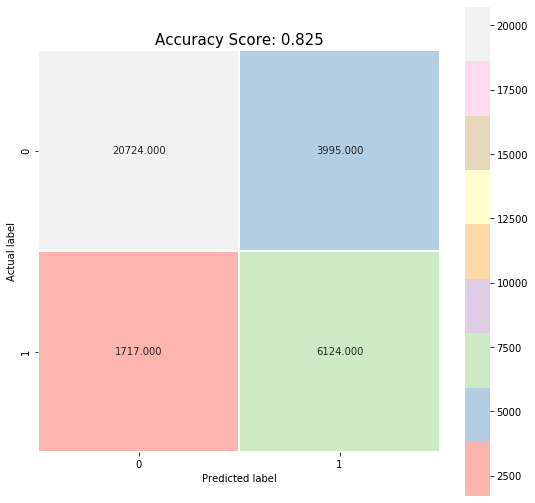

In [82]:
categoricalNB = CategoricalNB()
categoricalNB.fit(X_train,y)
y_pred = categoricalNB.predict(X_train)
score = np.round(categoricalNB.score(X_train,y), 3)
cm = confusion_matrix(y, y_pred)


plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
#plt.show();


### Adding sampleWgt to the model

In [83]:
adult.samplingWgt.describe()

count    3.256000e+04
mean     1.897818e+05
std      1.055498e+05
min      1.228500e+04
25%      1.178315e+05
50%      1.783630e+05
75%      2.370545e+05
max      1.484705e+06
Name: samplingWgt, dtype: float64

In [84]:
bins = np.arange(0,1.5e6, 1e5 )
data.samplingWgt = np.digitize(adult.samplingWgt, bins = bins)
test_data.samplingWgt = np.digitize(test.samplingWgt, bins = bins)

In [85]:
print(np.sort(data.samplingWgt.value_counts().index.tolist()))
print(np.sort(test_data.samplingWgt.value_counts().index.tolist()))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 15]


In [86]:
ordinal_encoder = OrdinalEncoder()
X_train = ordinal_encoder.fit_transform(data.drop(columns = ['salary']))
X_test = ordinal_encoder.transform(test_data.drop(columns = ['salary']))

In [87]:
cnb_clf = CategoricalNB()
cv = cross_val_score(cnb_clf, X_train,y, cv =10)
cv

array([0.81480344, 0.82186732, 0.82248157, 0.82063882, 0.82463145,
       0.82585995, 0.82831695, 0.83476658, 0.82493857, 0.82923833])

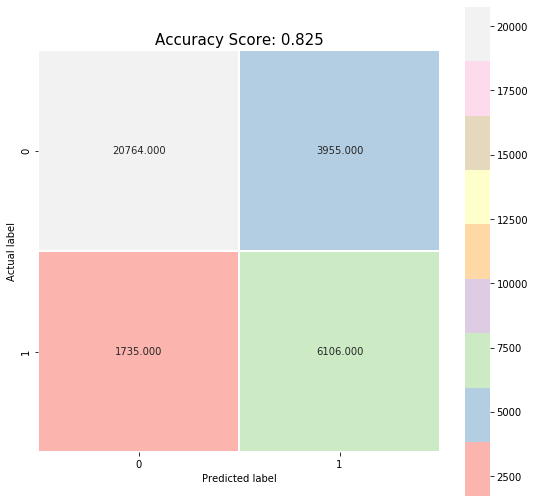

In [88]:
categoricalNB = CategoricalNB()
categoricalNB.fit(X_train,y)
y_pred = categoricalNB.predict(X_train)
score = np.round(categoricalNB.score(X_train,y), 3)
cm = confusion_matrix(y, y_pred)


plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
#plt.show();


Summary: 
- We were able to achive 0.83 accuracy score with CategoricalNB. Note that binning different features didn't help a lot for the performance of the model.

- Note that CategoricalNB has one major disadvantage. If in the test set, there is a feature not appeared in the training data, then it gives an error.

## Extra: Stacking Different Models

In [92]:
cnb_clf = CategoricalNB()

In [93]:
## Create a copy so that the original datasets are preserved.
data = adult.copy()
test_data = test.copy()
data.head()

,age,workClass,samplingWgt,ed,edYears,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hrsPerWeek,nativeCntry,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [94]:
X_cat = data[['workClass', 'ed', 'maritalStatus', 'occupation', 'relationship', 'race', 'sex', 'nativeCntry']]

In [95]:
ordinal_encoder = OrdinalEncoder()
X_cat = ordinal_encoder.fit_transform(X_cat)

In [96]:
y = data.salary

In [97]:
cnb_clf.fit(X_cat,y)

CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

In [98]:
data['pred'] = cnb_clf.predict_proba(X_cat)[:,1]

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
rf_clf = RandomForestClassifier(n_estimators= 300, max_depth= 9)

In [101]:
X = data[['pred', 'age', 'samplingWgt', 'edYears', 'capitalGain', 'capitalLoss', 'hrsPerWeek']]

In [102]:
cv = cross_val_score(rf_clf, X, y, cv = 10)

In [100]:
cv.mean()

0.8622850122850123

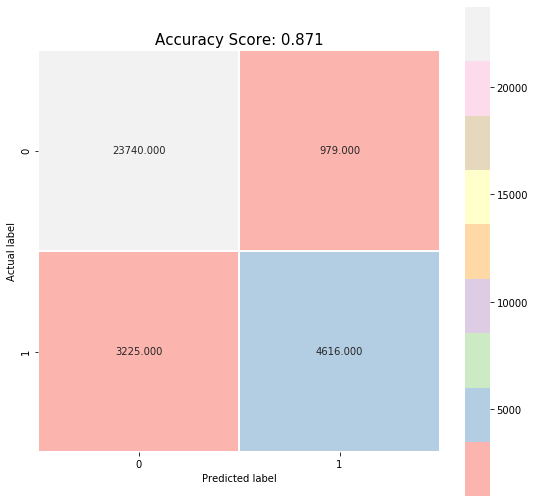

In [102]:
rf_clf.fit(X,y)
y_pred = rf_clf.predict(X)
score = np.round(rf_clf.score(X,y), 3)
cm = confusion_matrix(y, y_pred)


plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
#plt.show();
